# Task 2: Descriptive Analysis

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import json_normalize
import ast

pd.set_option('display.max_colwidth', None)

## a) Temporal Patterns & Seasonality

In this subsection, we want to find and explore temporal patterns as well as seasonality within the preprocessed data set.

In [324]:
# Read in the pre-processed dataset

temporal_df = pd.read_pickle("preparedData.pkl")
temporal_df

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [325]:
# Separate the attribute 'connectionTime' which is in a datetime format into serveral columns (hour, date, year) 

temporal_df["hour"] = temporal_df['connectionTime'].dt.hour
temporal_df["date"] = temporal_df['connectionTime'].dt.date
temporal_df["year"] = temporal_df['connectionTime'].dt.year
temporal_df

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,...,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,hour,date,year
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,...,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",13,2020-01-02,2020
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,...,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",13,2020-01-02,2020
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,...,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",13,2020-01-02,2020
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,...,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",13,2020-01-02,2020
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,...,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",14,2020-01-02,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,...,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT",19,2019-07-01,2019
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,...,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT",19,2019-07-01,2019
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,...,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT",20,2019-07-01,2019
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,...,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT",21,2019-07-01,2019


In [326]:
#create a new column with an ascending index of each row

connections = temporal_df.index
temporal_df["connections"]= connections

### Connections per Hour

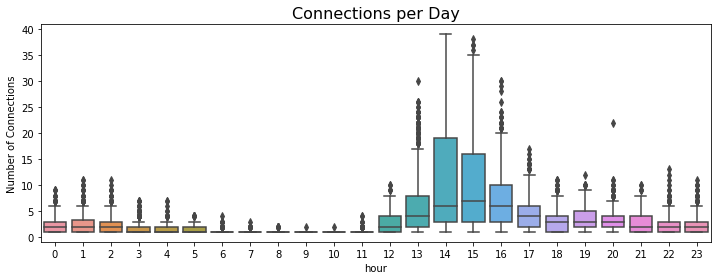

In [328]:

#create a boxplot of borrowed bikes per day
connections_per_hour = temporal_df.groupby(["date","hour"])["connections"].nunique()
connections_per_hour = pd.DataFrame(connections_per_hour)
fig,ax = plt.subplots(figsize=(12,4)) 

sns.boxplot(x=connections_per_hour.index.get_level_values(1), y=connections_per_hour["connections"],ax=ax)
ax.set_title("Connections per Day",fontsize=16)
plt.ylabel('Number of Connections')
#plt.savefig("daydemand.pdf")
plt.show()

As you can see in the barplot above, there is a very strange shift on the time axis. You should be expecting connections to peak in the morning and not at midday. It is particularly striking that no connections were registered at the beginning of the working day. While searching for the cause, it becomes apparent that the connection time is measured according to GMT. However, Los Angeles is in a different time zone, which is GMT-8. It is therefore necessary to recalculate the connection time by subtracting eight from each value. To ensure that we still come up with a new reasonable value, it is important to keep it in the range of 0 to 23 via additional operations. 

In [330]:
# Recalculate the 'hour' column in a copy of the original dataframe

gmt_8 = temporal_df.copy()

gmt_8['hour'] = (gmt_8['hour'] - 8) % 24
gmt_8['hour'] = gmt_8['hour'].astype(int)

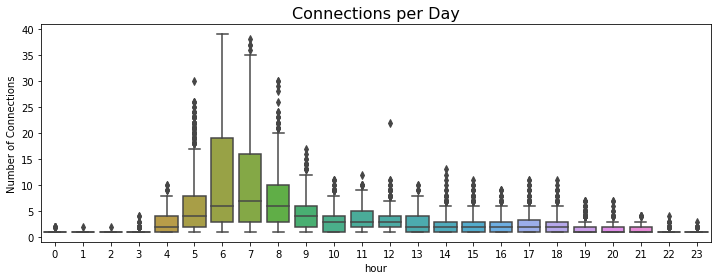

In [332]:
#create a boxplot of borrowed bikes per day

connections_per_hour8 = gmt_8.groupby(["date","hour"])["connections"].nunique()
connections_per_hour8 = pd.DataFrame(connections_per_hour8)
fig,ax = plt.subplots(figsize=(12,4)) 

sns.boxplot(x=connections_per_hour8.index.get_level_values(1), y=connections_per_hour8["connections"],ax=ax)
ax.set_title("Connections per Day",fontsize=16)
plt.ylabel('Number of Connections')
#plt.savefig("daydemand.pdf")
plt.show()

This new plot, which is based on the previously recalculated connection times according to GMT-8, makes much more sense in the context of the use case. You can observe a peak in the number of connections at 6 o'clock. During the night, on the other hand, there are no new connections.

### Connections per Day

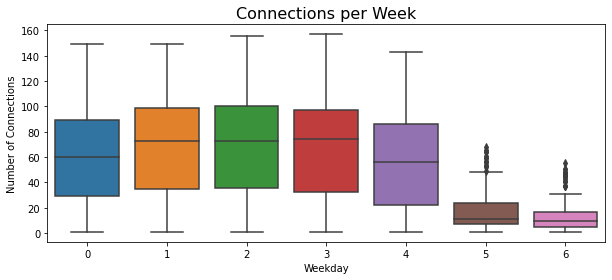

In [333]:
#create a boxplot of borrowed bikes per week

connections_per_weekday = temporal_df.groupby(["date","weekday"])["connections"].nunique()
connections_per_weekday= pd.DataFrame(connections_per_weekday)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=connections_per_weekday.index.get_level_values(1), y=connections_per_weekday["connections"],ax=ax)
ax.set_title("Connections per Week",fontsize=16)
plt.xlabel('Weekday')
plt.ylabel('Number of Connections')
#plt.savefig("weekdemand.pdf")
plt.show()

### Connections per Month

In [334]:
#unique_values = temporal_df['year'].unique()

#for value in unique_values:
#    print(value)

In [335]:
#create a column with month names

month_dict = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

In [363]:
d = []
for i in range(1, 13):
    d.append(
        {
            'Month': i,
            'Count': temporal_df[(temporal_df["month"] == i)].month.count()
        }
    )
year = pd.DataFrame(d)
year

,Month,Count
0,1,4798
1,2,4418
2,3,4283
3,4,3611
4,5,5255
5,6,4718
6,7,5297
7,8,5589
8,9,4681
9,10,5599


In [336]:
d18 = []
for i in range(1, 13):
    d18.append(
        {
            'Month': i,
            'Count': temporal_df[(temporal_df["month"] == i) & (temporal_df["year"] == 2018)].month.count()
        }
    )
year18 = pd.DataFrame(d18)
# year18

In [337]:
year18["Month"] = year18["Month"].apply(lambda x: month_dict[x])

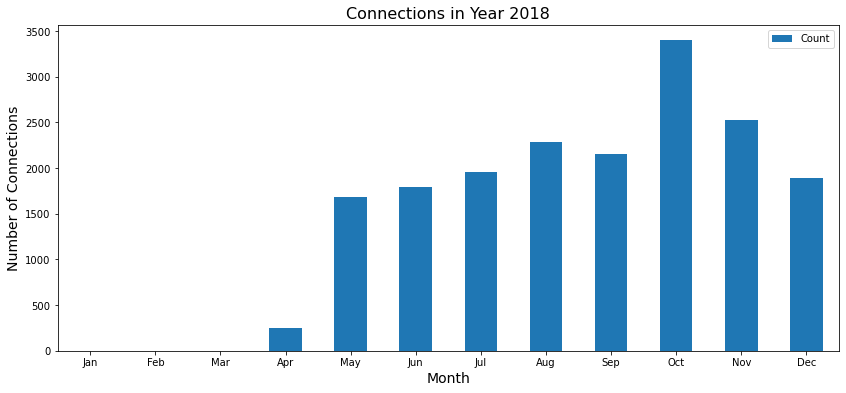

In [338]:
ax=year18.plot.bar(x='Month', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections in Year 2018",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Month', fontsize=14)
#plt.savefig("yeardemand.pdf")
plt.show()

In [374]:
d19 = []
for i in range(1, 13):
    d19.append(
        {
            'Month': i,
            'Count': temporal_df[(temporal_df["month"] == i) & (temporal_df["year"] == 2019)].month.count()
        }
    )
year19 = pd.DataFrame(d19)
year19

,Month,Count
0,1,2303
1,2,2167
2,3,2323
3,4,2479
4,5,2494
5,6,1556
6,7,1942
7,8,1972
8,9,1930
9,10,2199


In [375]:
year19["Month"] = year19["Month"].apply(lambda x: month_dict[x])

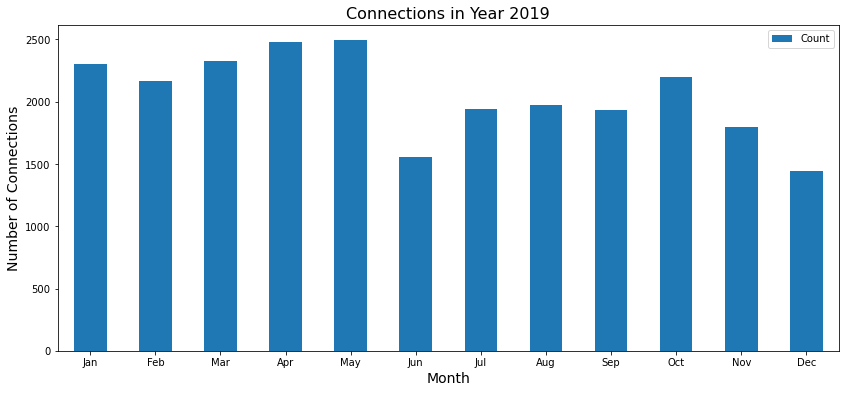

In [376]:
ax=year19.plot.bar(x='Month', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections in Year 2019",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Month', fontsize=14)
#plt.savefig("yeardemand.pdf")
plt.show()

In [342]:
d20 = []
for i in range(1, 13):
    d20.append(
        {
            'Month': i,
            'Count': temporal_df[(temporal_df["month"] == i) & (temporal_df["year"] == 2020)].month.count()
        }
    )
year20 = pd.DataFrame(d20)
# year20

In [343]:
year20["Month"] = year20["Month"].apply(lambda x: month_dict[x])

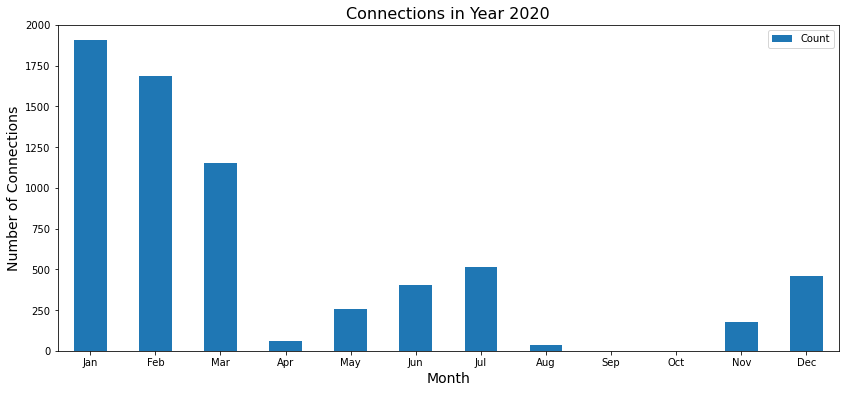

In [344]:
ax=year20.plot.bar(x='Month', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections in Year 2020",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Month', fontsize=14)
#plt.savefig("yeardemand.pdf")
plt.show()

In [345]:
d21 = []
for i in range(1, 13):
    d21.append(
        {
            'Month': i,
            'Count': temporal_df[(temporal_df["month"] == i) & (temporal_df["year"] == 2021)].month.count()
        }
    )
year21 = pd.DataFrame(d21)
#year21

In [346]:
year21["Month"] = year21["Month"].apply(lambda x: month_dict[x])

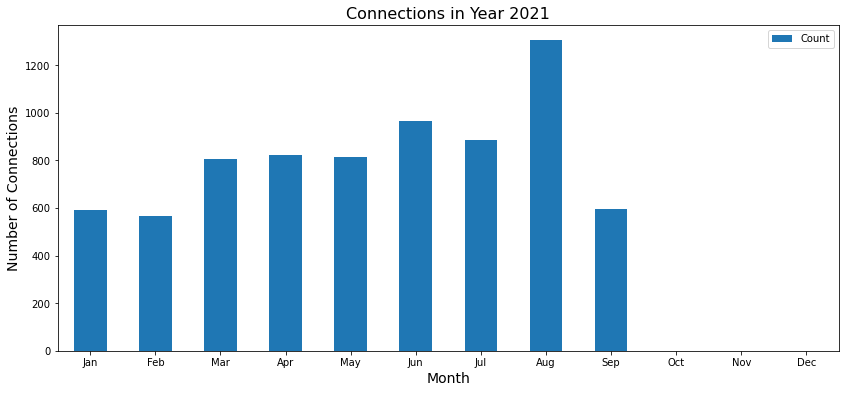

In [347]:
ax=year21.plot.bar(x='Month', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections in Year 2021",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Month', fontsize=14)
#plt.savefig("yeardemand.pdf")
plt.show()

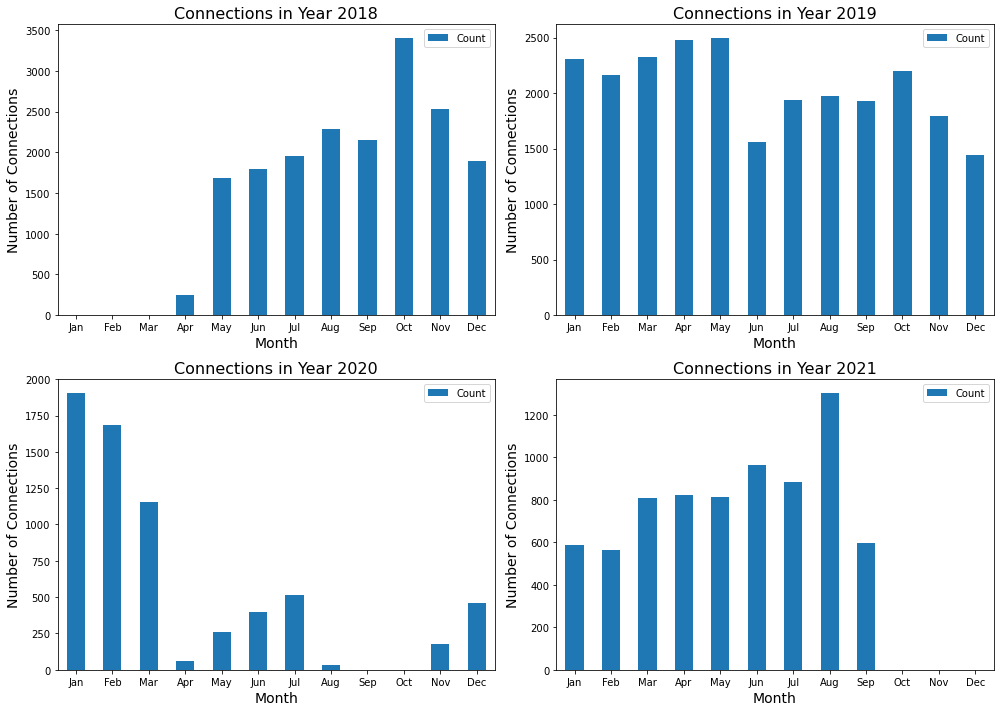

In [359]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot for Year 2018
year18.plot.bar(x='Month', y='Count', rot=0, ax=ax1)
ax1.set_title("Connections in Year 2018", fontsize=16)
ax1.set_ylabel('Number of Connections', fontsize=14)
ax1.set_xlabel('Month', fontsize=14)

# Plot for Year 2019
year19.plot.bar(x='Month', y='Count', rot=0, ax=ax2)
ax2.set_title("Connections in Year 2019", fontsize=16)
ax2.set_ylabel('Number of Connections', fontsize=14)
ax2.set_xlabel('Month', fontsize=14)

# Plot for Year 2020
year20.plot.bar(x='Month', y='Count', rot=0, ax=ax3)
ax3.set_title("Connections in Year 2020", fontsize=16)
ax3.set_ylabel('Number of Connections', fontsize=14)
ax3.set_xlabel('Month', fontsize=14)

# Plot for Year 2019
year21.plot.bar(x='Month', y='Count', rot=0, ax=ax4)
ax4.set_title("Connections in Year 2021", fontsize=16)
ax4.set_ylabel('Number of Connections', fontsize=14)
ax4.set_xlabel('Month', fontsize=14)

plt.tight_layout()
plt.show()

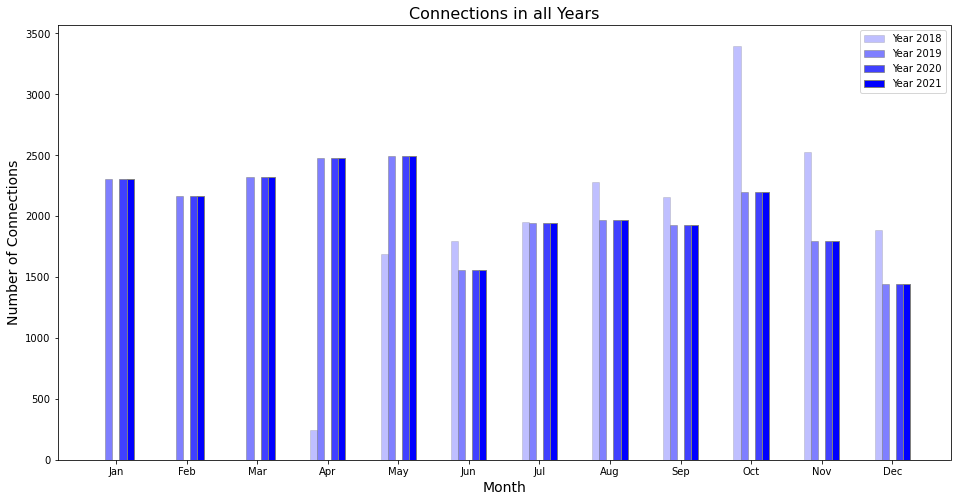

In [349]:
bar_width = 0.4
# Positions of the bars on the x-axis
r = np.arange(len(year18['Month']))

fig, ax = plt.subplots(figsize=(16, 8))

# Plot for Years
ax.bar(r - 2* bar_width/4, year18['Count'], color='blue', width=bar_width/4, edgecolor='grey', label='Year 2018', alpha=0.25)
ax.bar(r - bar_width/4, year19['Count'], color='blue', width=bar_width/4, edgecolor='grey', label='Year 2019', alpha=0.5)
ax.bar(r + bar_width/4, year19['Count'], color='blue', width=bar_width/4, edgecolor='grey', label='Year 2020', alpha=0.75)
ax.bar(r + 2* bar_width/4, year19['Count'], color='blue', width=bar_width/4, edgecolor='grey', label='Year 2021', alpha=1.0)

ax.set_title("Connections in all Years", fontsize=16)
ax.set_ylabel('Number of Connections', fontsize=14)
ax.set_xlabel('Month', fontsize=14)
ax.set_xticks(r)
ax.set_xticklabels(year18['Month'])
ax.legend()

plt.show()

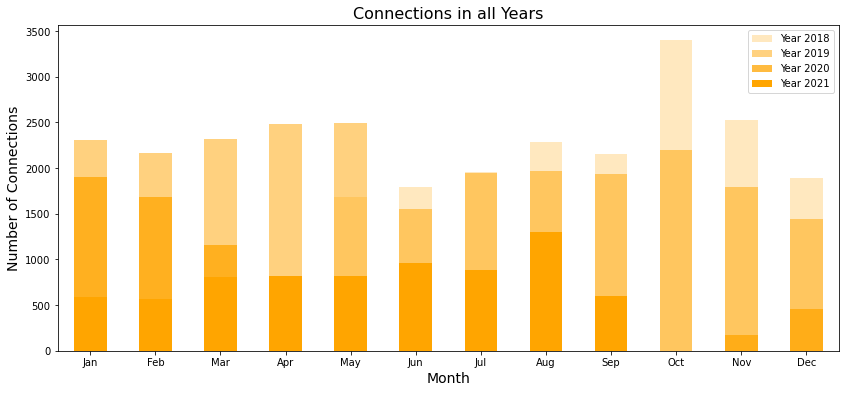

In [350]:
# Plot 2018
ax = year18.plot.bar(x='Month', y='Count', rot=0, color='orange', figsize=(14, 6), label='Year 2018', alpha=0.25)

year19.plot.bar(x='Month', y='Count', rot=0, ax=ax, color='orange', label='Year 2019', alpha=0.50)
year20.plot.bar(x='Month', y='Count', rot=0, ax=ax, color='orange', label='Year 2020', alpha=0.75)
year21.plot.bar(x='Month', y='Count', rot=0, ax=ax, color='orange', label='Year 2021', alpha=1)

ax.set_title("Connections in all Years", fontsize=16)
ax.set_ylabel('Number of Connections', fontsize=14)
ax.set_xlabel('Month', fontsize=14)
ax.legend()

plt.show()

### Connections per Season

In [361]:
# Create new Dataframe for the seasons and count connections with respect to the season.

seasons = pd.DataFrame()

seasons['Season'] = ["Winter", "Spring", "Summer", "Autumn"]
seasons['Count'] = [year[year["Month"]=="Dec"].Count.iloc[0] + year[year["Month"]=="Jan"].Count.iloc[0] + year[year["Month"]=="Feb"].Count.iloc[0],
                    year[year["Month"]=="Mar"].Count.iloc[0] + year[year["Month"]=="Apr"].Count.iloc[0] + year[year["Month"]=="May"].Count.iloc[0],
                    year[year["Month"]=="Jun"].Count.iloc[0] + year[year["Month"]=="Jul"].Count.iloc[0] + year[year["Month"]=="Aug"].Count.iloc[0],
                    year[year["Month"]=="Sep"].Count.iloc[0] + year[year["Month"]=="Oct"].Count.iloc[0] + year[year["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons

,Season,Count
0,Winter,1928
1,Spring,2025
2,Summer,6326
3,Autumn,8515


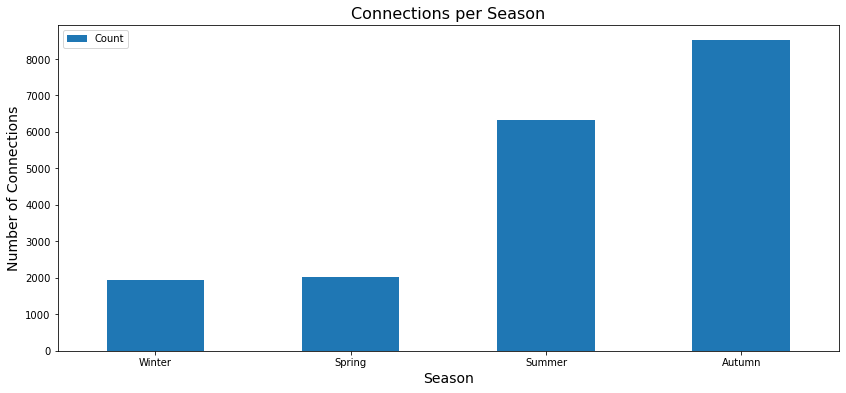

In [352]:
ax=seasons.plot.bar(x='Season', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections per Season",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.show()

In [364]:
# Create new Dataframe for the seasons and count connections with respect to the season.

seasons18 = pd.DataFrame()

seasons18['Season'] = ["Winter", "Spring", "Summer", "Autumn"]
seasons18['Count'] = [year18[year18["Month"]=="Dec"].Count.iloc[0] + year18[year18["Month"]=="Jan"].Count.iloc[0] + year18[year18["Month"]=="Feb"].Count.iloc[0],
                    year18[year18["Month"]=="Mar"].Count.iloc[0] + year18[year18["Month"]=="Apr"].Count.iloc[0] + year18[year18["Month"]=="May"].Count.iloc[0],
                    year18[year18["Month"]=="Jun"].Count.iloc[0] + year18[year18["Month"]=="Jul"].Count.iloc[0] + year18[year18["Month"]=="Aug"].Count.iloc[0],
                    year18[year18["Month"]=="Sep"].Count.iloc[0] + year18[year18["Month"]=="Oct"].Count.iloc[0] + year18[year18["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons18

,Season,Count
0,Winter,1889
1,Spring,1934
2,Summer,6031
3,Autumn,8081


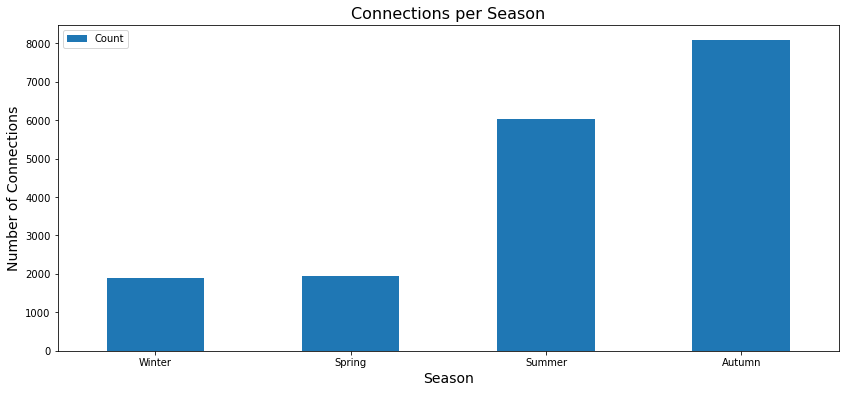

In [368]:
ax=seasons18.plot.bar(x='Season', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections per Season",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.show()

In [377]:
# Create new Dataframe for the seasons and count connections with respect to the season.

seasons19 = pd.DataFrame()

seasons19['Season'] = ["Winter", "Spring", "Summer", "Autumn"]
seasons19['Count'] = [year19[year19["Month"]=="Dec"].Count.iloc[0] + year19[year19["Month"]=="Jan"].Count.iloc[0] + year19[year19["Month"]=="Feb"].Count.iloc[0],
                    year19[year19["Month"]=="Mar"].Count.iloc[0] + year19[year19["Month"]=="Apr"].Count.iloc[0] + year19[year19["Month"]=="May"].Count.iloc[0],
                    year19[year19["Month"]=="Jun"].Count.iloc[0] + year19[year19["Month"]=="Jul"].Count.iloc[0] + year19[year19["Month"]=="Aug"].Count.iloc[0],
                    year19[year19["Month"]=="Sep"].Count.iloc[0] + year19[year19["Month"]=="Oct"].Count.iloc[0] + year19[year19["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons19

,Season,Count
0,Winter,5910
1,Spring,7296
2,Summer,5470
3,Autumn,5927


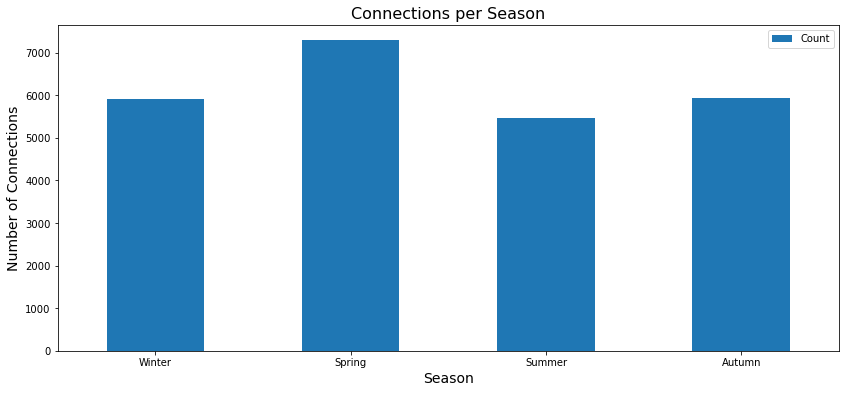

In [378]:
ax=seasons19.plot.bar(x='Season', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections per Season",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.show()

In [366]:
# Create new Dataframe for the seasons and count connections with respect to the season.

seasons20 = pd.DataFrame()

seasons20['Season'] = ["Winter", "Spring", "Summer", "Autumn"]
seasons20['Count'] = [year20[year20["Month"]=="Dec"].Count.iloc[0] + year20[year20["Month"]=="Jan"].Count.iloc[0] + year20[year20["Month"]=="Feb"].Count.iloc[0],
                    year20[year20["Month"]=="Mar"].Count.iloc[0] + year20[year20["Month"]=="Apr"].Count.iloc[0] + year20[year20["Month"]=="May"].Count.iloc[0],
                    year20[year20["Month"]=="Jun"].Count.iloc[0] + year20[year20["Month"]=="Jul"].Count.iloc[0] + year20[year20["Month"]=="Aug"].Count.iloc[0],
                    year20[year20["Month"]=="Sep"].Count.iloc[0] + year20[year20["Month"]=="Oct"].Count.iloc[0] + year20[year20["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons20

,Season,Count
0,Winter,4048
1,Spring,1473
2,Summer,951
3,Autumn,177


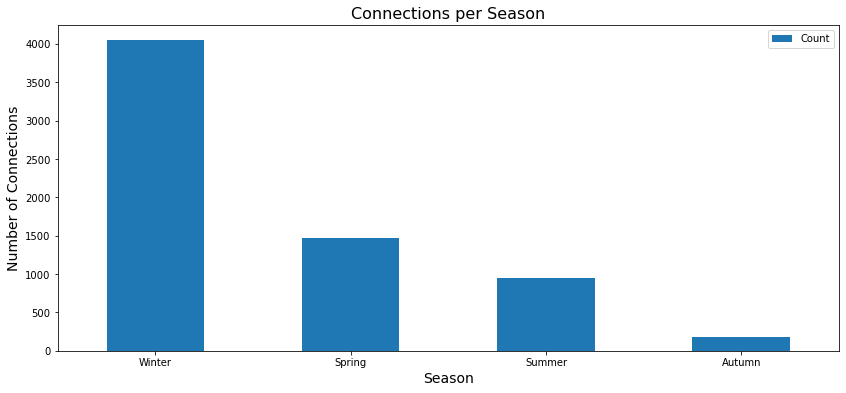

In [379]:
ax=seasons20.plot.bar(x='Season', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections per Season",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.show()

In [367]:
# Create new Dataframe for the seasons and count connections with respect to the season.

seasons21 = pd.DataFrame()

seasons21['Season'] = ["Winter", "Spring", "Summer", "Autumn"]
seasons21['Count'] = [year21[year21["Month"]=="Dec"].Count.iloc[0] + year21[year21["Month"]=="Jan"].Count.iloc[0] + year21[year21["Month"]=="Feb"].Count.iloc[0],
                    year21[year21["Month"]=="Mar"].Count.iloc[0] + year21[year21["Month"]=="Apr"].Count.iloc[0] + year21[year21["Month"]=="May"].Count.iloc[0],
                    year21[year21["Month"]=="Jun"].Count.iloc[0] + year21[year21["Month"]=="Jul"].Count.iloc[0] + year21[year21["Month"]=="Aug"].Count.iloc[0],
                    year21[year21["Month"]=="Sep"].Count.iloc[0] + year21[year21["Month"]=="Oct"].Count.iloc[0] + year21[year21["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons21

,Season,Count
0,Winter,1155
1,Spring,2446
2,Summer,3152
3,Autumn,596


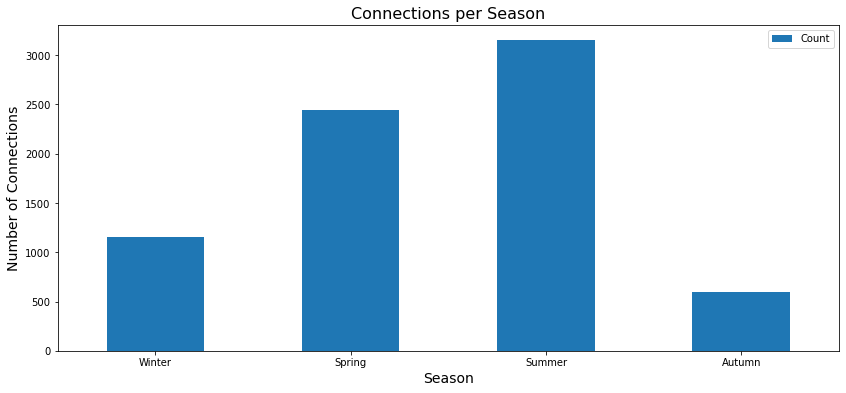

In [380]:
ax=seasons21.plot.bar(x='Season', y='Count', rot=0, figsize=(14,6))
ax.set_title("Connections per Season",fontsize=16)
plt.ylabel('Number of Connections', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.show()

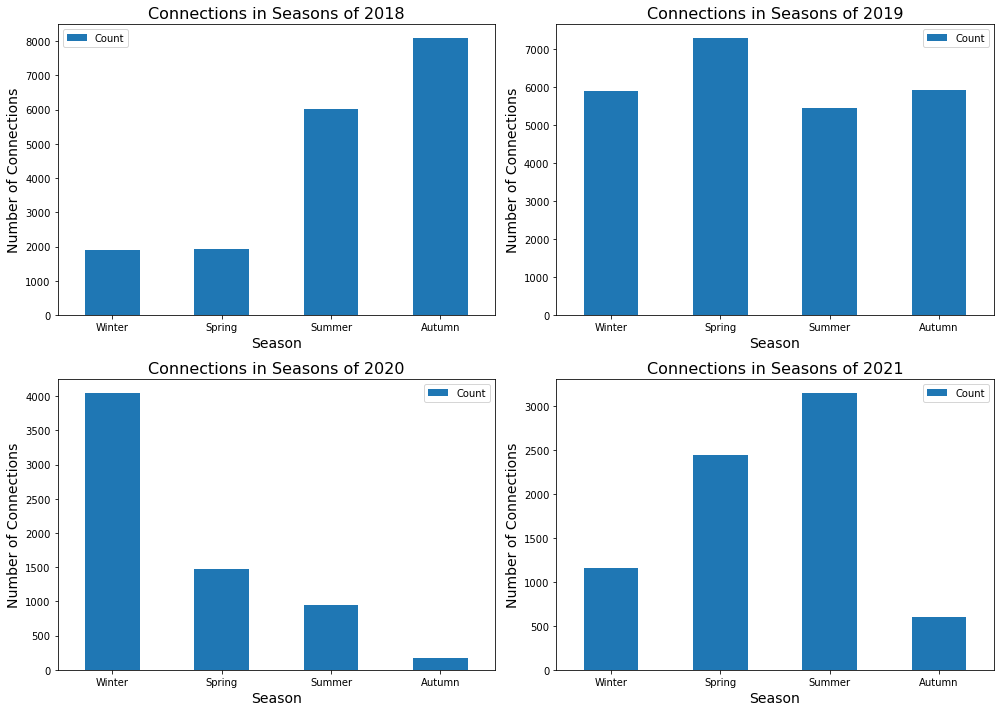

In [382]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot for Seasons 2018
seasons18.plot.bar(x='Season', y='Count', rot=0, ax=ax1)
ax1.set_title("Connections in Seasons of 2018", fontsize=16)
ax1.set_ylabel('Number of Connections', fontsize=14)
ax1.set_xlabel('Season', fontsize=14)

# Plot for Seasons 2019
seasons19.plot.bar(x='Season', y='Count', rot=0, ax=ax2)
ax2.set_title("Connections in Seasons of 2019", fontsize=16)
ax2.set_ylabel('Number of Connections', fontsize=14)
ax2.set_xlabel('Season', fontsize=14)

# Plot for Seasons 2020
seasons20.plot.bar(x='Season', y='Count', rot=0, ax=ax3)
ax3.set_title("Connections in Seasons of 2020", fontsize=16)
ax3.set_ylabel('Number of Connections', fontsize=14)
ax3.set_xlabel('Season', fontsize=14)

# Plot for Seasons 2019
seasons21.plot.bar(x='Season', y='Count', rot=0, ax=ax4)
ax4.set_title("Connections in Seasons of 2021", fontsize=16)
ax4.set_ylabel('Number of Connections', fontsize=14)
ax4.set_xlabel('Season', fontsize=14)

plt.tight_layout()
plt.show()

# TODO Seasons in die Variante von Year in einem Plot; aber Farben abändern